# Overview

In this notebook we explore quantiles in the following sections:
1. What is a quantile
2. Probability Refresher
3. What is a quantile function
4. How are quantiles used

# 1. What is a Quantile
## 1.1 Origin and Meaning Of The Term
The term quantile comes from the term quantity. A quantile is a part or subdivision of some quantitiy. It is also sometimes referred to as a fractile as it is a fraction of the whole.

## 1.1. General Definition
A quantile is a point or number that partitions a distribution of a data set. Said another way, a quantile is a point that divides a distribution into contiguous disjoint intervals.

Confusingly, quantile can also refer to the partitions bound by the quantile points. So the first quantile for example refers to both the first point along the x-axis (moving left to right) that partitions the distribution as well as the partition confined within that partitioning point.

## 1.2. Types of Quantiles And Applications
There are many types of quantiles.

It is often the case that the quantiles are uniformally sized; meaning the same number of datapoints are present in each partition. Applying this to a probability distribution rather than a raw numerical distirbution the partitions would have equal probabilities rather than equal number of elements.


## 1.3. Special Names For Common Quantiles

There are special names given to specific sets of quantiles. The median is a quantile: it splits a numeric distribution into two equal halves. Sets of 4 partitions are quartiles, 10 partitions are deciles, 100 partitions are percentiles. A more exhaustive list is maintained [here](https://en.wikipedia.org/wiki/Quantile#Specialized_quantiles).

Consider the following diagram which shows the normal distribution being divided into four equal quartiles by three quantiles ($Q1,Q2,Q3$).

<center><img src="./normal_distribution_quantiles.png" alt="Normal Distribution Quantiles" width="400"/></center>

### Additional Reading

https://www.statisticshowto.com/quantile-definition-find-easy-steps/

https://en.wikipedia.org/wiki/Quantile


# 2. Probability Refresher
The upcoming topic (the quantile function) is closely related to concepts in probability. We will review the relevant concepts before proceeding.

## 2.1. Probability Density Function
The probability density function (or probability mass function in the discrete case) gives the probability that a variable falls within a particular range of values.

The density of $X$ is defined as $f_X$, or $\phi_X(x)$ such that:

$$ P(a \le X \le b) = \int_a^b f_X(x)dx $$

A graph of the PDF resembles the following:

<center><img src="normal distribution pdf.png" style="width:300px" ></center>

## 2.2. Cumulative Density Function
This function is also referred to as the distribution function.

It is a special case of the probability density function.

A cumulative density function gives the cumulative probability density for the interval $(-\infty, x)$. In layman's terms it is the probability that $X$ takes on a value less than or equal to $x$.

For the variable $X$ the CDF is often written as:

$$ F_X(x):=P(X<=x) $$

This function typically takes on an s-shaped curve. For example consider the CDF for the normal distribution denoted as $\Phi_{\mu,\sigma}(X)$:

<center><img src="normal distribution cdf.png" style="width:300px"></center>

Now that that's out of the way, lets talk about Quantile Functions.

# 3. What Is A Quantile Function?

As the name suggests, a quantile function returns a quantile (a point on a number line). More specifically, it returns the left most quantile.

We can define the function as follows:

$$ Q_X(q_x)= x $$

The function $Q_X$ maps a cumulative precentage $q_x$ to a coresponding value of a random variable. Given a cumulative percentage, the quantile function will return the coresponding point $x$ such that the percent of points in the domain are to the left of $x$.

## 3.1. Quantile Calculation and Estimation

There are many formulas for calculating the value of a quantile from a distrete sample and these methods vary between statistical software. In 1996, Hyndman and Fan published *Sample Quantiles in Statistical Packages* which catalogues nine such methods.

Below is a comparison:

<img src="quantile_methods.png" width="800px"/>

Note: $N$ is the sample size, $q$ coresponds to the q-quantile ($q=2$ means two partitions of the sample), $k$ coresponds to an integer indicating the number of q-quantiles, $p=\frac{k}{q}$ which coresponds to the p-quantile.

## 3.2. Quantiles In Python

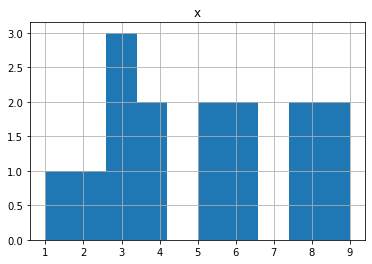

In [14]:
import numpy, pandas

# Create a dummy sample set
df = pandas.DataFrame({"x": [1,2,5,4,3,6,5,3,8,3,4,9,9,8,6]})

# Show the hsitogram
df.hist();

In [20]:
for q in [0.1, 0.25, 0.5, 0.75, 0.9]:
    print("Quantile {0}: {1}".format(q, numpy.quantile(df["x"], q)))

Quantile 0.1: 2.4000000000000004
Quantile 0.25: 3.0
Quantile 0.5: 5.0
Quantile 0.75: 7.0
Quantile 0.9: 8.6


For more information about the numpy implimentation see the [documentation](https://numpy.org/devdocs/reference/generated/numpy.quantile.html).

# 3.1. What Is The Connection With Probability?

Relating this to a probability, our percentage $q_x$ can also be a cumulative probabiliy $f_x$ because objects from a probability space and a percentile space have similar mathematical characteristics to those in a probability space.

Recall the definition of a cumulative probability $f_x$ and the cumulative density function $F_X$:

$$f_x := F_X(x) = P(X \le x)$$

And as our quantile function accepts a cumulative probability $f_x$ and returns the coresponding value $x$ we see that it begins to look like an inverse CDF function:

$$ Q_X(f_x) = x $$

$$ F_X^{-1}(f_x) = x $$

### 3.1.1. Example using quantile function as inverse CDF
So for example, if we want the quantile $x$ that will partition the x axis of the distribution functions into segments containing 1/4 and 3/4 of the distribution values we would find the quantile $x$ such that $Q_X(p=\frac{1}{4})=x$. Again, this can be done using the inverse cumulative density function $F_X^{-1}(p=\frac{1}{4})=x$

# 4. How Are Quantiles Used?

## 4.1 Connection with CDF and PDF Approximation

We will see that the many CDF approximation techniques are defined in terms of a quantile.

For example the Generalize Lambda distribution is defined as such:

$$ Q(y)=Q(y;\lambda_1,\lambda_2,\lambda_3,\lambda_4) = \lambda_1 + \frac{y^{\lambda_3}-(1-y)^{\lambda_4}}{\lambda_3}  $$

where $0 \le y \le 1$.

The probability density function (PDF) for the GLD can be derived from the percentile function and is defined as follows:

$$ f(x) = \frac{\lambda_2}{\lambda_3 y^{\lambda_3 - 1} + \lambda_4(1-y)^{\lambda_4 - 1}} $$

at $x=Q(y)$. ans since $x=Q(y)$ we have $y=F(x)$.

## 4.2. Quantile-Quantile (QQ) Plots

A QQ plot is a graphical tool to help us compare one distribution against another. A QQ plot will plot the quantiles of one variable or sample against another. The resulting line, and it's shape, indicate how the two quantiles, and thus ditributions, are related.

If the two distributions are equal, the quantiles will be equal which will result in a $45^\circ$ line.

<img src='equivalent qq plot.png' style='width:300px' >

If the two distributions are unequal you will not see a strainght $45^\circ$ line.

<img src='chi vs normal qq plot.png' style='width:300px' >

There are many shapes the QQ plot can take on. The table below outlines the important ones:

<table>
	<thead>
		<tr>
			<th style="text-align: left;">Shape</th>
			<th style="text-align: left;">Interpretation</th>
            <th style="text-align: left;">Explanation</th>
		</tr>
	</thead>
       <colgroup>
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 55%;">
    </colgroup>
	<tbody>
		<tr>
			<td style="text-align: left;">Steep Line</td>
			<td style="text-align: left;">Y is more dispersed than X</td>
            <td style="text-align: left;">
                Each quantile of Y is larger than the corresponding quantile of X.
                Thus each percentage of values of Y exist in a larger range of values
                than the values of X for the same percentage.
                A larger range for Y means that the data points are more dispersed.
            </td>
		</tr>
		<tr>
			<td style="text-align: left;">45&deg; line</td>
			<td style="text-align: left;">Y is equally dispersed as X (Y = X)</td>
            <td style="text-align: left;">
            For each quantile, there are the same number of X and Y values.
            </td>
		</tr>
		<tr>
			<td style="text-align: left;">Flat Line</td>
			<td style="text-align: left;">Y is less dispersed than X</td>
            <td style="text-align: left;">Opposite of steep line</td>
		</tr>
		<tr>
			<td style="text-align: left;">Concave Up (slope increasing)</td>
			<td style="text-align: left;">Y is less skewed than X</td>
            <td style="text-align: left;">
            Accelleration is described as an increasing slope.
            In the context of quantiles, it means that one axis is experiencing greater dispersion.
            A greater relative dispersion means a greater grouping of point on the opposing axis.
            A grouping of values indicates a skew.
            </td>
		</tr>
		<tr>
			<td style="text-align: left;">Concave Down</td>
			<td style="text-align: left;">Y is more skewed than X</td>
            <td style="text-align: left;">Opposite of concave up</td>
		</tr>
		<tr>
			<td style="text-align: left;">S-shaped</td>
			<td style="text-align: left;">Y has heavier tails than X</td>
            <td style="text-align: left;">
            The tails of the qq plot are flatter rather than steeper.
            Flattening of the plot indicates that Y is less dispersed than X.
            The means that the tails of Y are less dispersed than X.
            The dispersion stretches a tail, so a relative lack of dispersion 
            results in a "fatter" or "heavier" tail.
            </td>
		</tr>
		<tr>
			<td style="text-align: left;">Backwards-S</td>
			<td style="text-align: left;">Y has lighter tails than X</td>
            <td style="text-align: left;">
            Opposite of S shaped
            </td>
		</tr>
	</tbody>
</table>

### 4.2.1. QQ Plots in Python
#### 4.2.1. Statsmodels Implimentation
This statsmodels python library has builtin methods that help us creating a QQ plot.

The qqplot() function for example allows us to generate a qq plot which compares our sample data to some known theoretical distribution. By default this distribution is the normal distribution.

https://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot.html

In our example, we will generate a normal random variable and compare it against the theoretical normal distribution. We are expecting to see a 45$^\circ$ line

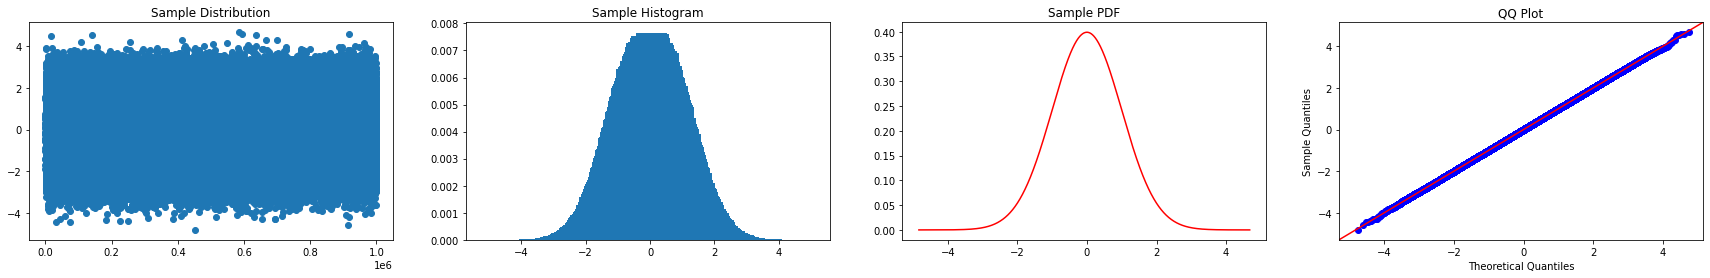

In [9]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
from scipy.stats import norm

# Generate a random variable
sample_size = 1000000
numpy.random.seed(seed=42)
x = numpy.arange(0,sample_size)
y = numpy.random.normal(0, 1, sample_size)

# Generate a histogram information for the variable (see the histogram notebook)
bins = 500
counts, bin_edges = numpy.histogram(y, bins=bins)

# Calculate the probabilities of each bin
bin_witdth = numpy.diff(bin_edges, 1)[0]
bin_units = bin_witdth * 10 ** - precision
bin_midpoints = bin_edges[:-1] + (bin_witdth / 2)
probabilities = counts / sum(counts * bin_witdth)
probabilities = counts / sample_size

# Generate information about our distribution
y_sort = numpy.sort(y, axis=-1, kind='quicksort', order=None)
norm_pdf = norm(0,1).pdf(y_sort)

# Create our plot objects
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(nrows=1, ncols=4)
fig.set_figwidth(30)

# Graph the variable, the histogram, and the qq plot
ax1.scatter(x, y)
ax1.set_title("Sample Distribution")
ax2.bar(bin_midpoints, probabilities)
ax2.set_title("Sample Histogram")
ax3.plot(y_sort, norm_pdf, color='red')
ax3.set_title("Sample PDF")
sm.qqplot(y, line='45', ax=ax4)
ax4.set_title("QQ Plot");

### 4.2.2. Altenrate Implimentation
In some cases we may not be working with a theoretical distribution or statsmodels may not have implimented the distribution of interest. In such case, we can manually calculate and plot quantiles.

In the method below we have two random variables and we calculate histograms for each one with equal number of bins. This will natually create quantiles that equally partition the samples. As such they can be directly compared.

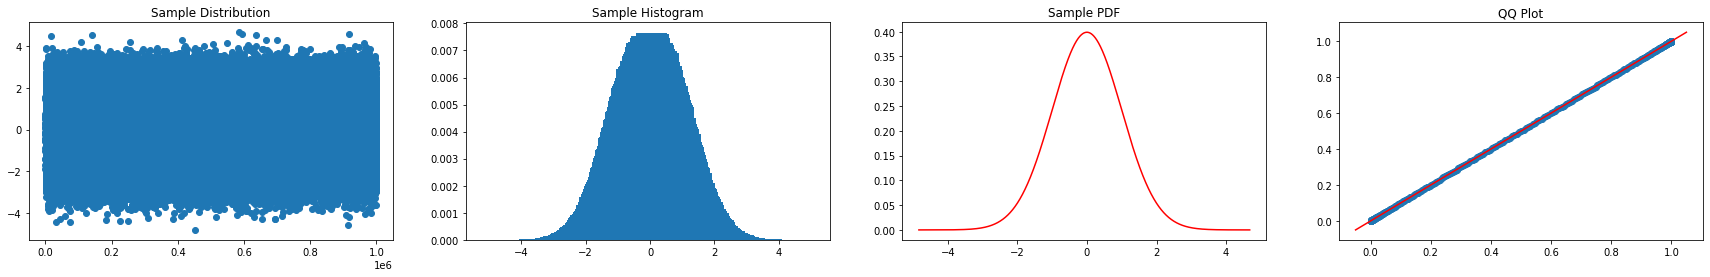

In [25]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
from scipy.stats import norm

# Generate a random variable
sample_size = 1000000
numpy.random.seed(seed=42)
x = numpy.arange(0,sample_size)
y = numpy.random.normal(0, 1, sample_size)
z = numpy.random.normal(0, 1, sample_size)

# Generate a histogram information for the variable (see the histogram notebook)
bins = 500
y_counts, y_bin_edges = numpy.histogram(y, bins=bins)
z_counts, z_bin_edges = numpy.histogram(y, bins=bins)

# Calculate the probabilities of each bin
y_probabilities = y_counts / sample_size
z_probabilities = z_counts / sample_size

# Calculate the cumulative probabilities
y_cum_prob = numpy.cumsum(y_probabilities)
z_cum_prob = numpy.cumsum(z_probabilities)

# Calculate the percentiles
y_percentiles = y_bin_edges[0:-1] + numpy.diff(y_bin_edges)
z_percentiles = z_bin_edges[0:-1] + numpy.diff(z_bin_edges)

# Create our plot objects
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(nrows=1, ncols=4)
fig.set_figwidth(30)

# Graph the variable, the histogram, and the qq plot
ax1.scatter(x, y)
ax1.set_title("Sample Distribution")
ax2.bar(bin_midpoints, probabilities)
ax2.set_title("Sample Histogram")
ax3.plot(y_sort, norm_pdf, color='red')
ax3.set_title("Sample PDF")
ax4.plot([-0.05,1.05],[-0.05,1.05],color='red')
ax4.scatter(y_cum_prob, z_cum_prob)

ax4.set_title("QQ Plot");